# Simulacion de distribuciones por radio censal

**A continuación se detalla:**

1. Estimación del total de viviendas/hogares cuando la información del precenso 2020 es desconocida
2. Estimación del total de viviendas/hogares por categorías a partir del total estimado en `1`.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt

In [3]:
from datasources import (
    personas_radios_prov,
    tipoviv_radios_prov,
    radios_prov,
    radios_eph_censo_2010,
    persproy_depto_2025
)

2023-05-19 16:36:32.687 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2023-05-19 16:36:32.689 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2023-05-19 16:36:32.690 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2023-05-19 16:36:32.692 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2023-05-19 16:36:32.693 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2023-05-19 16:36:32.694 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager


In [4]:
from modeling_tools import (
    simulate_total_var,
    simulate_cat_var
)

In [5]:
# GEOMETRIAS
envolvente = radios_eph_censo_2010(aglo_idx='08')
chaco_2001 = radios_prov(year=2001, prov='chaco', mask=envolvente)
chaco_2010 = radios_prov(year=2010, prov='chaco', mask=envolvente)

In [6]:
# TABLAS REDATAM - HOGARES/VIVIENDAS
tipo_2001 = tipoviv_radios_prov(year=2001, prov='chaco',var_types={'link':'object'})
tipo_2001_geo = chaco_2001.set_index('link').join(tipo_2001.set_index('link'))
tipo_2010 = tipoviv_radios_prov(year=2010, prov='chaco',var_types={'link':'object'})
tipo_2010_geo = chaco_2010.set_index('link').join(tipo_2010.set_index('link'))

In [7]:
# TABLAS REDATAM - PERSONAS
pers_2001 = personas_radios_prov(year=2001, prov='chaco', var_types={'link':'object'})
pers_2001_geo = chaco_2001.set_index('link').join(pers_2001.set_index('link'))
pers_2010 = personas_radios_prov(year=2010, prov='chaco', var_types={'link':'object'})
pers_2010_geo = chaco_2010.set_index('link').join(pers_2010.set_index('link'))

In [8]:
# Tabla de proyecciones de poblacion por departamento
proy = persproy_depto_2025(prov='chaco')

In [9]:
# Total viviendas 2020
tipo_2010_geo['total_2020'] = simulate_total_var(gdf_pers_01=pers_2001_geo, gdf_var_01=tipo_2001_geo, 
                                                 gdf_pers_10=pers_2010_geo, gdf_var_10=tipo_2010_geo,
                                                 proy_df=proy, namedept='San Fernando', 
                                                 base_year='2010', forecast_year='2020',
                                                 catname='total')

The total number of projected households/residential units is 132131


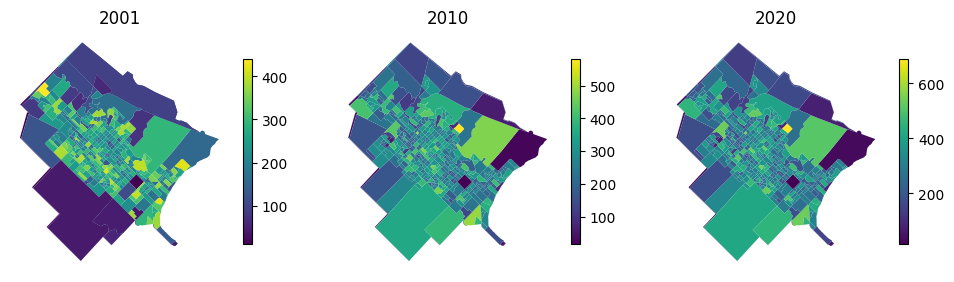

In [10]:
# CHEQUEO TOTALES VIVIENDA
f = plt.figure(figsize=(12,8))
ax1 = f.add_subplot(1,3,1)
ax2 = f.add_subplot(1,3,2)
ax3 = f.add_subplot(1,3,3)

tipo_2001_geo.plot(ax=ax1, column='total', legend=True, legend_kwds={'shrink': 0.3})
tipo_2010_geo.plot(ax=ax2, column='total', legend=True, legend_kwds={'shrink': 0.3})
tipo_2010_geo.plot(ax=ax3, column='total_2020', legend=True, legend_kwds={'shrink': 0.3})

ax1.set_title('2001')
ax1.set_axis_off()
ax2.set_title('2010')
ax2.set_axis_off()
ax3.set_title('2020')
ax3.set_axis_off();

In [11]:
# Con catname uso la distribucion de una variable en 2001 y de otra en 2010 en funcion del diccionario que pasamos como parametro
simulated_distribution = simulate_cat_var(gdf_var_01=tipo_2001_geo, 
                                          gdf_var_10=tipo_2010_geo,
                                          base_year='0110', forecast_year='2020',
                                          forecast_gdf=tipo_2010_geo, pct_val=2.5, 
                                          catname={'2001':'casilla', '2010':'rancho'}, tot_colname='total_2020')

tipo_2010_geo['informal_2020'] = tipo_2010_geo.index.map(simulated_distribution)

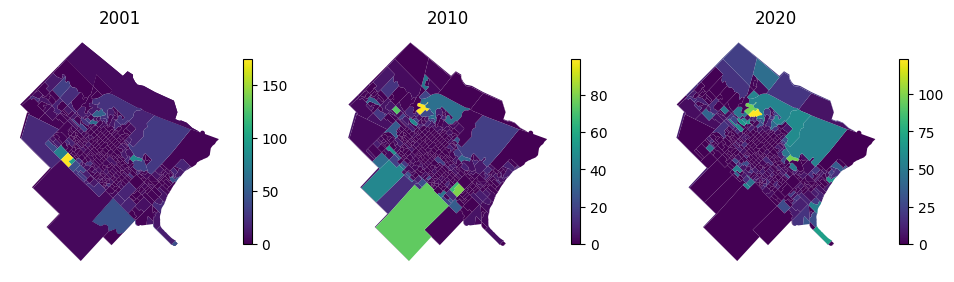

In [12]:
f = plt.figure(figsize=(12,8))
ax1 = f.add_subplot(1,3,1)
ax2 = f.add_subplot(1,3,2)
ax3 = f.add_subplot(1,3,3)

tipo_2001_geo.plot(ax=ax1, column='casilla', legend=True, legend_kwds={'shrink': 0.3})
tipo_2010_geo.plot(ax=ax2, column='casilla', legend=True, legend_kwds={'shrink': 0.3})
tipo_2010_geo.plot(ax=ax3, column='informal_2020', legend=True, legend_kwds={'shrink': 0.3})

ax1.set_title('2001')
ax1.set_axis_off()
ax2.set_title('2010')
ax2.set_axis_off()
ax3.set_title('2020')
ax3.set_axis_off();

In [13]:
from datasources import servurban_radios_prov

In [14]:
servurban_2001 = servurban_radios_prov(prov='chaco',var_types={'link':'object'})
servurban_2001_geo = tipo_2001_geo.join(servurban_2001.set_index('link'))

In [15]:
servurban_2001_geo.columns

Index(['geometry', 'casa a', 'casa b', 'rancho', 'casilla', 'departamento',
       'pieza en inquilinato', 'pieza en hotel o pension',
       'local no construido para habitacion', 'vivienda movil', 'en la calle',
       'total', 'pavimento_si', 'pavimento_no', 'pavimento_sa',
       'recoleccion_residuos_si', 'recoleccion_residuos_no',
       'recoleccion_residuos_sa', 'trans_pub_300m_si', 'trans_pub_300m_no',
       'trans_pub_300m_sa', 'telefono_publico_300m_si',
       'telefono_publico_300m_no', 'telefono_publico_300m_sa'],
      dtype='object')

In [16]:
tipo_2010_geo.columns

Index(['geometry', 'casa', 'rancho', 'casilla', 'departamento',
       'pieza en inquilinato', 'pieza en hotel o pension',
       'local no construido para habitacion', 'vivienda movil', 'en la calle',
       'total', 'total_2020', 'informal_2020'],
      dtype='object')

In [17]:
simulated_distribution = simulate_cat_var(gdf_var_01=servurban_2001_geo, 
                                          gdf_var_10=tipo_2010_geo,
                                          base_year='0110', forecast_year='2020',
                                          forecast_gdf=tipo_2010_geo, pct_val=2.5, 
                                          catname={'2001':'pavimento_no', '2010':'casilla'}, tot_colname='total_2020')

tipo_2010_geo['informal_2020'] = tipo_2010_geo.index.map(simulated_distribution)

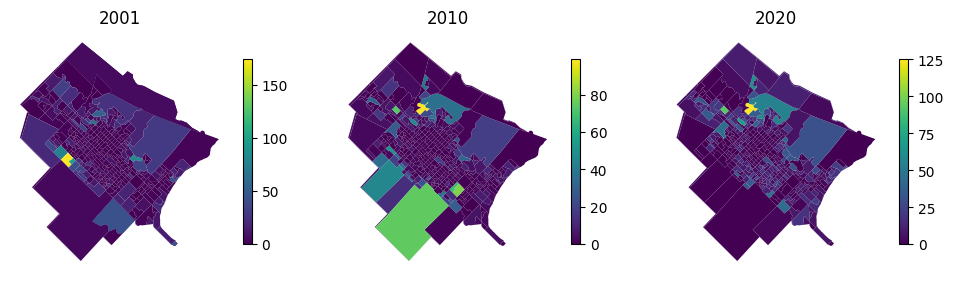

In [18]:
f = plt.figure(figsize=(12,8))
ax1 = f.add_subplot(1,3,1)
ax2 = f.add_subplot(1,3,2)
ax3 = f.add_subplot(1,3,3)

tipo_2001_geo.plot(ax=ax1, column='casilla', legend=True, legend_kwds={'shrink': 0.3})
tipo_2010_geo.plot(ax=ax2, column='casilla', legend=True, legend_kwds={'shrink': 0.3})
tipo_2010_geo.plot(ax=ax3, column='informal_2020', legend=True, legend_kwds={'shrink': 0.3})

ax1.set_title('2001')
ax1.set_axis_off()
ax2.set_title('2010')
ax2.set_axis_off()
ax3.set_title('2020')
ax3.set_axis_off();

In [19]:
servurban_2001_geo.head()

,geometry,casa a,casa b,rancho,casilla,departamento,pieza en inquilinato,pieza en hotel o pension,local no construido para habitacion,vivienda movil,...,pavimento_sa,recoleccion_residuos_si,recoleccion_residuos_no,recoleccion_residuos_sa,trans_pub_300m_si,trans_pub_300m_no,trans_pub_300m_sa,telefono_publico_300m_si,telefono_publico_300m_no,telefono_publico_300m_sa
link,,,,,,,,,,,,,,,,,,,,,
220770201,"POLYGON ((-59.03193 -27.38516, -59.03140 -27.3...",9,18,2,1,0,0,0,0,0,...,0,0,46,0,0,46,0,0,46,0
220770202,"POLYGON ((-59.00951 -27.36516, -59.02445 -27.3...",41,151,25,8,0,0,0,2,0,...,0,0,280,0,131,149,0,38,242,0
220770304,"POLYGON ((-59.04852 -27.40125, -59.04848 -27.4...",7,46,41,1,0,0,0,5,0,...,0,0,116,0,16,100,0,0,116,0
220770305,"POLYGON ((-59.05871 -27.41042, -59.05825 -27.4...",1,21,4,1,0,0,0,0,0,...,0,0,37,0,0,37,0,0,37,0
221260306,"POLYGON ((-58.89337 -27.46346, -58.89257 -27.4...",14,47,8,2,0,0,0,1,0,...,0,25,94,0,60,59,0,60,59,0
